<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/causality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Granger Causality

*Author: Alexander Del Toro Barba*

**Import Libraries**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from scipy import stats

# Data Import

* Information for pairs0001: DWD weather data (Deutscher Wetterdienst). 
* data was taken at 349 stations. x: altitude. y: temperature (average over 1961-1990). 
* ground truth: x (altitude) --> y (temperature). Imported data are reverse!
* https://webdav.tuebingen.mpg.de/cause-effect/ (data: pair0001.txt)

In [0]:
url = 'https://raw.githubusercontent.com/deltorobarba/repo/master/dwdwd.csv'
series = pd.read_csv(url)

# Data Summary

**Causality: altitude determines temperature.**

In [3]:
series.head()

,temperature,altitude
0,9.7,205.0
1,8.2,46.0
2,6.4,794.0
3,8.1,325.0
4,6.2,500.0


In [4]:
series.describe()

,temperature,altitude
count,349.000000,349.000000
mean,8.041547,332.470201
std,1.518514,339.297625
min,-4.800000,0.000000
25%,7.500000,70.000000
50%,8.300000,255.000000
75%,8.900000,490.000000
max,10.800000,2960.000000


Text(0.5, 0, 'record number')

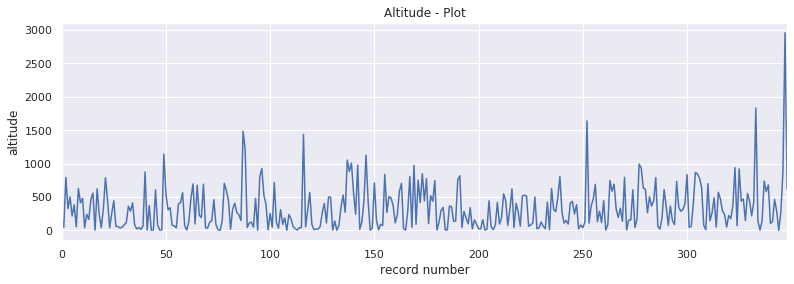

In [5]:
df = series.altitude
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.5,title='Altitude - Plot')
plt.ylabel('altitude')
plt.xlabel('record number')

Text(0.5, 0, 'record number')

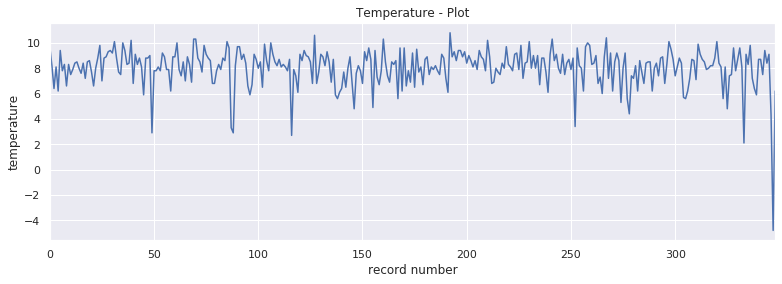

In [6]:
df = series.temperature
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.5,title='Temperature - Plot')
plt.ylabel('temperature')
plt.xlabel('record number')

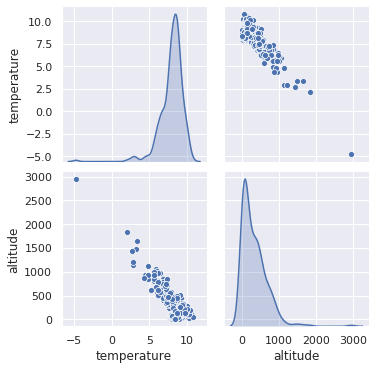

In [7]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.pairplot(series, diag_kind='kde')

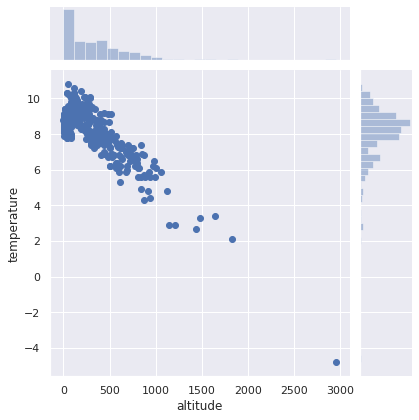

In [8]:
sns.jointplot(x="altitude", y="temperature", data=series);

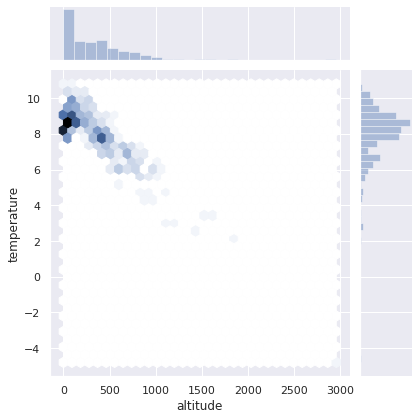

In [9]:
sns.jointplot(x="altitude", y="temperature", data=series, kind="hex");

# Distribution Tests

## Altitude

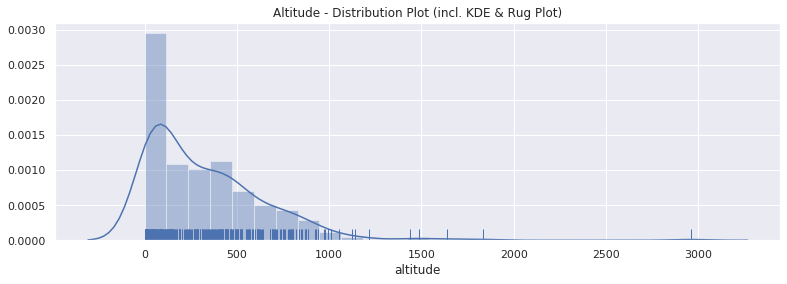

In [10]:
df = series.altitude
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('Altitude - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

Text(0.5, 1.0, 'Altitude - Boxplot')

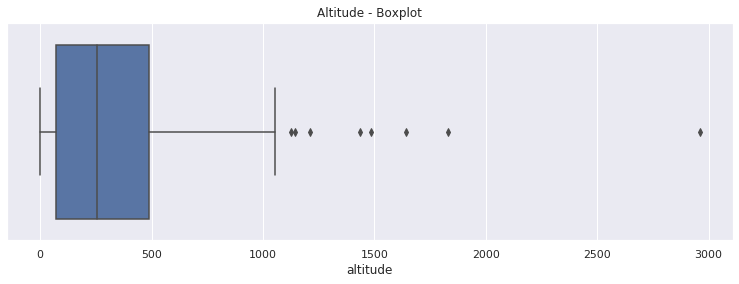

In [11]:
sns.boxplot(series.altitude).set_title('Altitude - Boxplot')

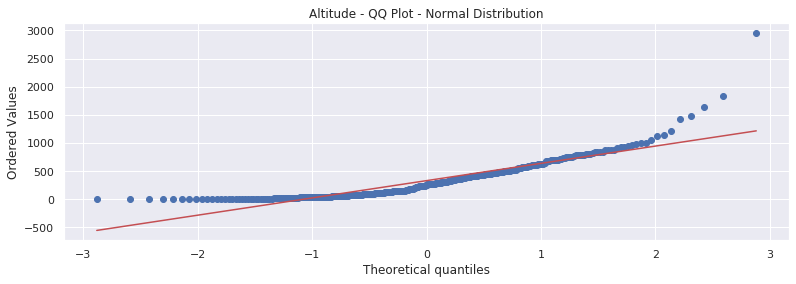

In [12]:
# QQ Plot agains Normal Distribution
stats.probplot(series.altitude, dist="norm", plot=plt)
plt.title('Altitude - QQ Plot - Normal Distribution')
plt.show()

In [13]:
# BDS test statistic for independence of a time series
# Time Series is IID (= Null Hypothesis)
statsmodels.tsa.stattools.bds(series.altitude, max_dim=2, epsilon=None, distance=1.5)

(array(2.31945308), array(0.02037048))

In [14]:
# Kolmogorov-Smirnov Test
stats.kstest(series.altitude, 'norm')

KstestResult(statistic=0.981458124891006, pvalue=0.0)

In [15]:
# Jarque Bera Test
stats.jarque_bera(series.altitude)

(2064.794586952086, 0.0)

In [16]:
# Anderson-Darling Test
stats.anderson(series.altitude)

AndersonResult(statistic=12.089460712374148, critical_values=array([0.57 , 0.649, 0.778, 0.908, 1.08 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## Temperature

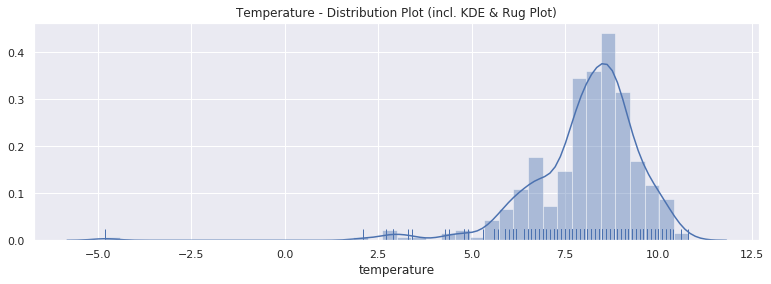

In [17]:
df = series.temperature
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('Temperature - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

Text(0.5, 1.0, 'Temperature - Boxplot')

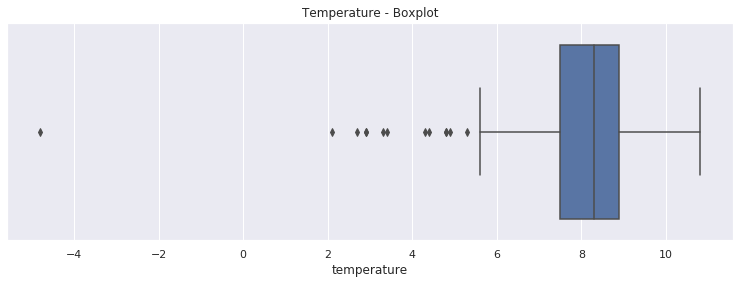

In [18]:
sns.boxplot(series.temperature).set_title('Temperature - Boxplot')

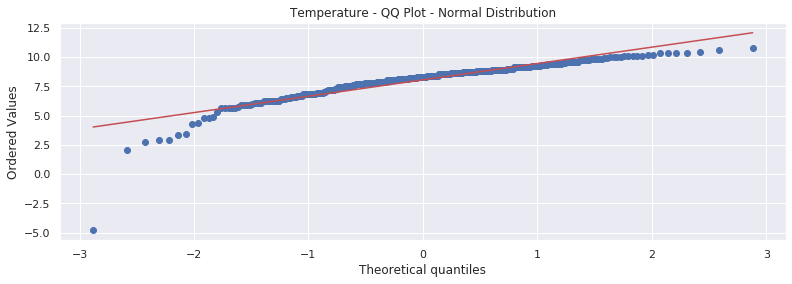

In [19]:
# QQ Plot agains Normal Distribution
stats.probplot(series.temperature, dist="norm", plot=plt)
plt.title('Temperature - QQ Plot - Normal Distribution')
plt.show()

In [20]:
# BDS test statistic for independence of a time series
# Time Series is IID (= Null Hypothesis)
statsmodels.tsa.stattools.bds(series.temperature, max_dim=2, epsilon=None, distance=1.5)

(array(2.73064808), array(0.00632099))

In [21]:
# Kolmogorov-Smirnov Test
stats.kstest(series.temperature, 'norm')

KstestResult(statistic=0.9908023671711714, pvalue=0.0)

In [22]:
# Jarque Bera Test
stats.jarque_bera(series.temperature)

(3751.9230765077978, 0.0)

In [23]:
# Anderson-Darling Test
stats.anderson(series.temperature)

AndersonResult(statistic=8.390889256041362, critical_values=array([0.57 , 0.649, 0.778, 0.908, 1.08 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

# Stationarity & Unit Root Tests

## Altitude

In [24]:
# Augmented Dicker Fuller test
# H0: There is a unit root for the series (non stationary). Reject H0 if p-value of less than 5% 
# no constant, no trend
from statsmodels.tsa.stattools import adfuller
statsmodels.tsa.stattools.adfuller(series.altitude, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(-0.9515401249834828,
 0.30769611012215203,
 9,
 339,
 {'1%': -2.572366841047328,
  '10%': -1.6160594843409037,
  '5%': -1.9418208099194678},
 4824.59436823102)

p-value above 0.05. Not reject H0. Series is stationary. No transformation for Granger test required.

In [25]:
# KPSS - Level Stationarity Test
statsmodels.tsa.stattools.kpss(series.altitude, regression='c', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


(0.5333581121385597,
 0.03415357834717125,
 17,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [26]:
# KPSS Trend Stationary Test
statsmodels.tsa.stattools.kpss(series.altitude, regression='ct', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.11208884562937994,
 0.1,
 17,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

## Temperature

In [27]:
# Augmented Dicker Fuller test
# H0: There is a unit root for the series (non stationary). Reject H0 if p-value of less than 5% 
# no constant, no trend
from statsmodels.tsa.stattools import adfuller
statsmodels.tsa.stattools.adfuller(series.temperature, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(-0.6339022228005764,
 0.44041908479350433,
 13,
 335,
 {'1%': -2.572446348852751,
  '10%': -1.6160506730814628,
  '5%': -1.9418309449500106},
 1234.78964767413)

p-value above 0.05. Not reject H0. Series is stationary. No transformation for Granger test required.

In [28]:
# KPSS - Level Stationarity Test
statsmodels.tsa.stattools.kpss(series.temperature, regression='c', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.2938080259334782,
 0.1,
 17,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [29]:
# KPSS Trend Stationary Test
statsmodels.tsa.stattools.kpss(series.temperature, regression='ct', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.11487974842824311,
 0.1,
 17,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

# Johansen Cointegration

In [30]:
# Johansen Cointegration test
# H0 is no cointegration. 
# If two time series, X and Y, are cointegrated, there must exist Granger causality either from X to Y, or from Y to X, both in both directions.
# The presence of Granger causality in either or both directions between X and Y does not necessarily imply that the series will be cointegrated.
statsmodels.tsa.stattools.coint(series.temperature, series.altitude, trend='ct', method='aeg', autolag='aic')

(-16.91074371383036,
 2.0803870788988523e-33,
 array([-4.3722787 , -3.80799901, -3.51672086]))

Very small p-value. Reject H0. Cointegration present. Granger causality must exit.

# Granger Causality Test

In [31]:
# Granger Causality
# Null hypothesis: x2 does NOT Granger cause x1
# Reject null hypothesis if the p-values are below 0.05
statsmodels.tsa.stattools.grangercausalitytests(series, maxlag = 5, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0073  , p=0.9322  , df_denom=345, df_num=1
ssr based chi2 test:   chi2=0.0073  , p=0.9318  , df=1
likelihood ratio test: chi2=0.0073  , p=0.9318  , df=1
parameter F test:         F=0.0073  , p=0.9322  , df_denom=345, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0111  , p=0.9890  , df_denom=342, df_num=2
ssr based chi2 test:   chi2=0.0225  , p=0.9888  , df=2
likelihood ratio test: chi2=0.0225  , p=0.9888  , df=2
parameter F test:         F=0.0111  , p=0.9890  , df_denom=342, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5076  , p=0.6773  , df_denom=339, df_num=3
ssr based chi2 test:   chi2=1.5543  , p=0.6698  , df=3
likelihood ratio test: chi2=1.5508  , p=0.6706  , df=3
parameter F test:         F=0.5076  , p=0.6773  , df_denom=339, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4959  , p=0.7387  

{1: ({'lrtest': (0.0073220232561652665, 0.9318091841628995, 1),
   'params_ftest': (0.007258978731095423, 0.9321520966757063, 345.0, 1.0),
   'ssr_chi2test': (0.0073221002853119, 0.9318088263479407, 1),
   'ssr_ftest': (0.007258978731128176, 0.9321520966757063, 345.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.022478104603578686, 0.9888238698972881, 2),
   'params_ftest': (0.011077465089424164, 0.9889840189338585, 342.0, 2.0),
   'ssr_chi2test': (0.022478832667106253, 0.9888235099340562, 2),
   'ssr_ftest': (0.011077465089553802, 0.988984018933727, 342.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1.5507969987843353, 0.6705969925730577, 3),
   'params_ftest': (0.5076108889015457, 0.6772803254793123, 339.0, 3.0),
   'ssr_chi2test': (1.55427758902468, 0.6698009161604406, 3),
   'ssr_ftest': (0.5076108889011238, 0.6772803254795996, 339.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [

Test result confirms Granger causality. 